In [10]:
# Load the graph
%run src/load_graph.py --input data/facebook_combined.txt.gz --output results/graph_baseline.pkl

[+] Loading graph from data/facebook_combined.txt.gz
[+] Loaded graph with 4039 nodes and 88234 edges
[+] Saving graph to results/graph_baseline.pkl
[+] Graph saved.


In [11]:
# Extract features
%run src/features.py --graph results/graph_baseline.pkl --out results/features_baseline.csv


[+] Extracting features...
[+] Features saved to results/features_baseline.csv


In [12]:
# Train baseline model
%run src/train.py --features results/features_baseline.csv --model_out results/model_baseline.pkl


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1152
           1       0.00      0.00      0.00        60

    accuracy                           0.95      1212
   macro avg       0.48      0.50      0.49      1212
weighted avg       0.90      0.95      0.93      1212

AUC: 0.49284577546296293
[+] Model saved to results/model_baseline.pkl


In [13]:
# Generate bots
%run src/generate_labels.py --graph results/graph_baseline.pkl --out results/labels.csv --bot_rate 0.03

[+] Computing node anomaly scores...
[+] Generated labels: 122 bots out of 4039 nodes
[+] Saved labels to results/labels.csv


In [14]:
# Perform evasion attack
%run src/attacks.py --attack evasion --graph results/graph_baseline.pkl --out results/graph_evasion.pkl --bots_file results/bots.txt --budget 3


[+] Running Structural Evasion Attack...
[+] Attacked graph saved to results/graph_evasion.pkl


In [15]:
# Extract features for attacked graph
%run src/features.py --graph results/graph_evasion.pkl --out results/features_evasion.csv


[+] Extracting features...
[+] Features saved to results/features_evasion.csv


In [16]:
# Train model after attack
%run src/train.py --features results/features_evasion.csv --model_out results/model_attacked.pkl

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1152
           1       0.00      0.00      0.00        60

    accuracy                           0.95      1212
   macro avg       0.48      0.50      0.49      1212
weighted avg       0.90      0.95      0.93      1212

AUC: 0.5057942708333333
[+] Model saved to results/model_attacked.pkl


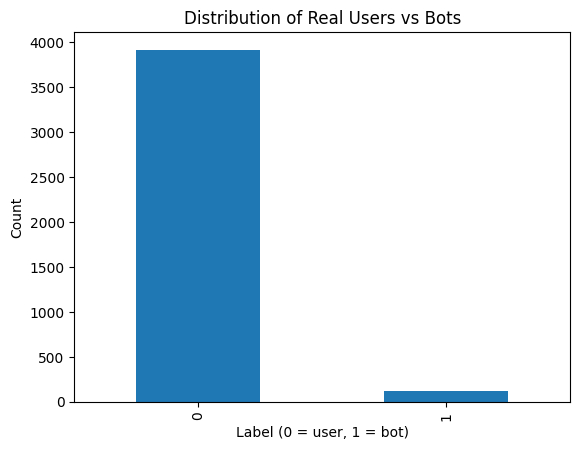

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results/features_labeled.csv")

df['label'].value_counts().plot(kind='bar')
plt.title("Distribution of Real Users vs Bots")
plt.xlabel("Label (0 = user, 1 = bot)")
plt.ylabel("Count")
plt.show()


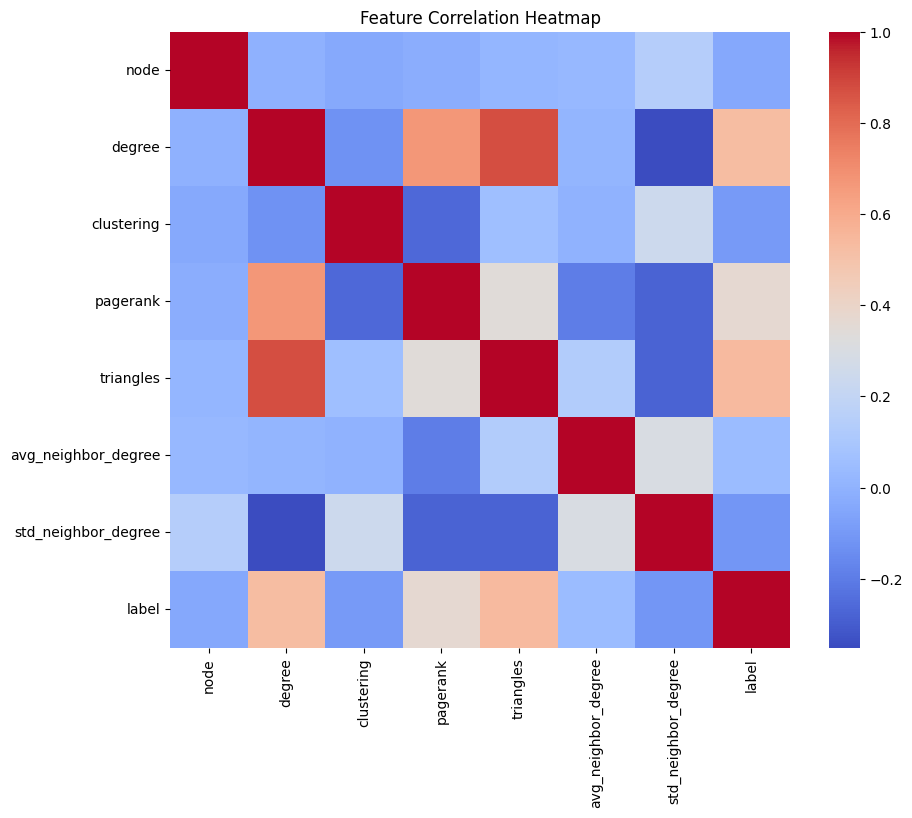

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("results/features_labeled.csv")

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


c:\Users\Oma20\Desktop\Social_lab3\venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


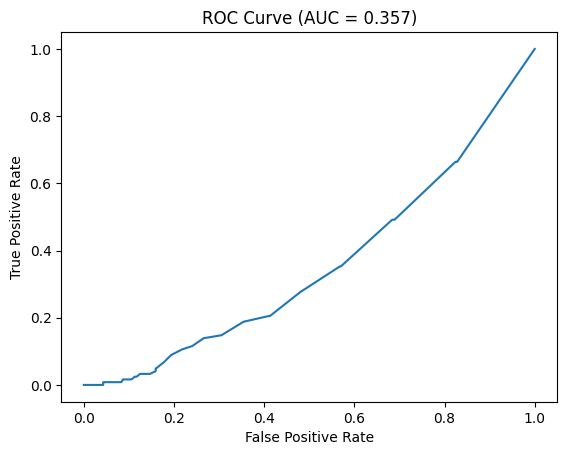

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
import pickle

# Load model
model = pickle.load(open("results/model_baseline.pkl", "rb"))

df = pd.read_csv("results/features_labeled.csv")
X = df.drop(columns=["label", "node"])
y = df["label"]

probs = model.predict_proba(X)[:,1]
fpr, tpr, _ = roc_curve(y, probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


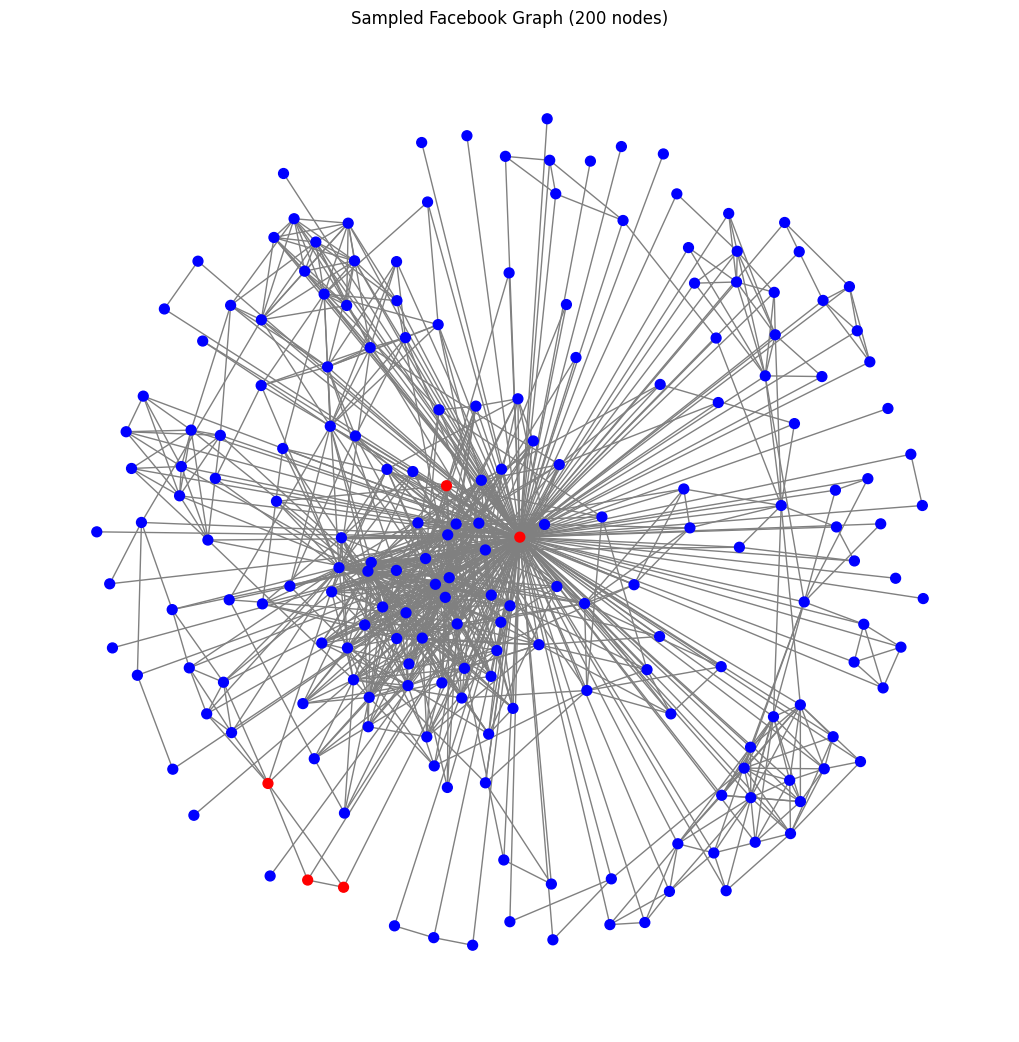

In [23]:
# Sample 200 nodes to visualize
nodes_sample = list(G.nodes())[:200]  # first 200 nodes
G_sub = G.subgraph(nodes_sample)

# Prepare colors for the sampled nodes
colors = ["red" if labels_dict.get(node,0)==1 else "blue" for node in G_sub.nodes()]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw(G_sub, pos, node_size=50, node_color=colors, edge_color='gray')
plt.title("Sampled Facebook Graph (200 nodes)")
plt.show()